Submission Model Nlp With Tensorflow
Nama: Anggoro dwi prasetyo
anggorodwiprasetyo3@gmail.com

dataset = https://www.kaggle.com/datasets/algord/fake-news

In [1]:
import pandas as pd
df = pd.read_csv('FakeNewsNet.csv') 
df = df[['title','real']] 
df

,title,real
0,Kandi Burruss Explodes Over Rape Accusation on...,1
1,People's Choice Awards 2018: The best red carp...,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,1
3,Colombian singer Maluma sparks rumours of inap...,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,1
...,...,...
23191,Pippa Middleton wedding: In case you missed it...,1
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,0
23193,Jessica Chastain Recalls the Moment Her Mother...,1
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",0


In [2]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23196 non-null  object
 1   real    23196 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 362.6+ KB


title    0
real     0
dtype: int64

In [3]:
df['real'].value_counts()

1    17441
0     5755
Name: real, dtype: int64

In [4]:
category = pd.get_dummies(df.real)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='real', axis=1)
df_new

,title,0,1
0,Kandi Burruss Explodes Over Rape Accusation on...,0,1
1,People's Choice Awards 2018: The best red carp...,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,0,1
3,Colombian singer Maluma sparks rumours of inap...,0,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,0,1
...,...,...,...
23191,Pippa Middleton wedding: In case you missed it...,0,1
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,1,0
23193,Jessica Chastain Recalls the Moment Her Mother...,0,1
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",1,0


In [5]:
title = df_new['title'].astype(str)
label = df_new[[0,1]].values
df

,title,real
0,Kandi Burruss Explodes Over Rape Accusation on...,1
1,People's Choice Awards 2018: The best red carp...,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,1
3,Colombian singer Maluma sparks rumours of inap...,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,1
...,...,...
23191,Pippa Middleton wedding: In case you missed it...,1
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,0
23193,Jessica Chastain Recalls the Moment Her Mother...,1
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",0


In [6]:
from sklearn.model_selection import train_test_split
title_train, title_val, label_train, label_val = train_test_split(title, label, test_size=0.2)
     

In [7]:
print('Jumlah data train = ',len(title_train) )
print('Jumlah data validasi = ',len(title_val) )
print('Jumlah total data = ',len(title_train)+len(title_val))

Jumlah data train =  18556
Jumlah data validasi =  4640
Jumlah total data =  23196


In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(title_train) 
tokenizer.fit_on_texts(title_val)
 
sekuens_train = tokenizer.texts_to_sequences(title_train)
sekuens_val = tokenizer.texts_to_sequences(title_val)
 
padded_train = pad_sequences(sekuens_train) 
padded_val = pad_sequences(sekuens_val)
     

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Dense,Flatten,Embedding,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=128),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
     
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         640000    
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 706,114
Trainable params: 706,114
Non-trai

In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai >95%!")
      self.model.stop_training = True
callbacks = myCallback()

In [11]:
history = model.fit(padded_train, label_train, 
                    epochs=50, 
                    validation_data=(padded_val, label_val), verbose=2, callbacks=[callbacks])


Epoch 1/50
580/580 - 11s - loss: 0.4279 - accuracy: 0.8157 - val_loss: 0.3903 - val_accuracy: 0.8409 - 11s/epoch - 18ms/step
Epoch 2/50
580/580 - 4s - loss: 0.3163 - accuracy: 0.8694 - val_loss: 0.4151 - val_accuracy: 0.8394 - 4s/epoch - 6ms/step
Epoch 3/50
580/580 - 3s - loss: 0.2558 - accuracy: 0.8914 - val_loss: 0.4172 - val_accuracy: 0.8349 - 3s/epoch - 6ms/step
Epoch 4/50
580/580 - 3s - loss: 0.2010 - accuracy: 0.9161 - val_loss: 0.4566 - val_accuracy: 0.8297 - 3s/epoch - 6ms/step
Epoch 5/50
580/580 - 4s - loss: 0.1611 - accuracy: 0.9296 - val_loss: 0.6159 - val_accuracy: 0.8050 - 4s/epoch - 6ms/step
Epoch 6/50
580/580 - 4s - loss: 0.1267 - accuracy: 0.9435 - val_loss: 0.8602 - val_accuracy: 0.8142 - 4s/epoch - 6ms/step
Epoch 7/50

Akurasi telah mencapai >95%!
580/580 - 4s - loss: 0.1126 - accuracy: 0.9509 - val_loss: 0.9149 - val_accuracy: 0.8119 - 4s/epoch - 6ms/step


In [12]:
import matplotlib.pyplot as plt

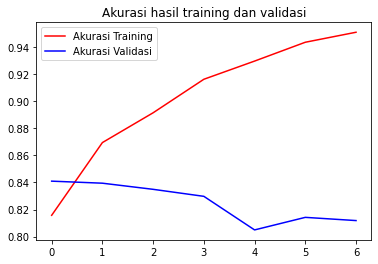

<Figure size 432x288 with 0 Axes>

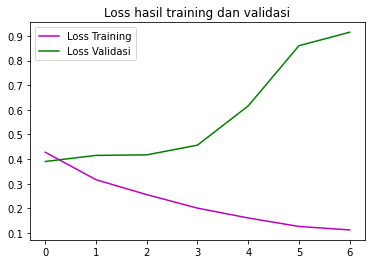

<Figure size 432x288 with 0 Axes>

In [13]:
acc=history.history['accuracy']
val_acc= history.history['val_accuracy']
loss = history.history['loss']
val_loss= history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Training')
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi hasil training dan validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'm', label='Loss Training')
plt.plot(epochs, val_loss, 'g', label='Loss Validasi')
plt.title('Loss hasil training dan validasi')
plt.legend(loc=0)
plt.figure()
plt.show()